In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick

beta = 1
gamma = 0.5
delta = 0
lambd = 0.1

x0 = np.array([0.9, 0.05, 0.05, 0])

def f(x):
    assert x.shape == (4,)
    S = x[0]
    V = x[1]
    I = x[2]
    R = x[3]
    dS = -beta*S*I - delta*V*S + lambd*R
    dV = delta*V*S
    dI = beta*S*I - gamma*I
    dR = gamma*I - lambd*R
    return np.array([dS,dV,dI,dR])

def approx(N):
    x = x0.copy()
    h = 80.0/N

    out = np.empty(shape=(N+1,4))

    for i in range(N):
        out[i] = x
        x += h * f(x)
    
    out[N] = x

    return out

In [2]:
#6a
print("Max deviance from sum of 1 =", np.max(np.abs(1 - np.apply_along_axis(sum, 1, approx(16000)))))

Max deviance from sum of 1 = 6.217248937900877e-15


In [3]:
def p6plot():
    N = 160000
    arr = approx(N)
    ts = np.linspace(0,80,N+1)

    plt.figure()
    plt.plot(ts, arr[:,0], '-', label='S(t)')
    plt.plot(ts, arr[:,1], '-.', label='V(t)')
    plt.plot(ts, arr[:,2], '--', label='I(t)')
    plt.plot(ts, arr[:,3], ':', label='R(t)')
    plt.legend()
    plt.ylabel("Population")
    plt.xlabel("t")
    plt.gca().get_yaxis().set_major_formatter(mtick.PercentFormatter(1))
    plt.show()

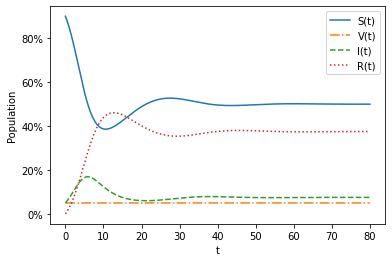

In [4]:
#6b
global delta, lambd
delta = 0
lambd = 0.1
p6plot()

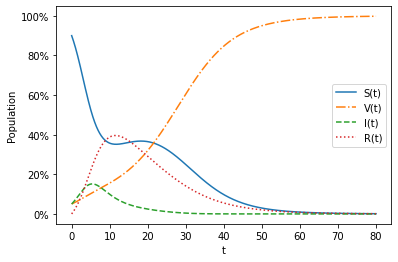

In [5]:
#6c
global delta, lambd
delta = 0.2
lambd = 0.1
p6plot()

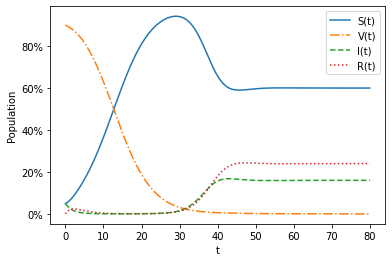

In [6]:
#6d
# Story:  Some pandemic, vaccine is made, majority of population gets vaccinated
#   Then, vaccines get outlawed somehow, and the vaccine effectiveness turns out to be temporary
# Result: Disease never leaves!

global x0, beta, gamma, delta, lambd
x0 = np.array([0.05,0.9,0.05,0])
beta = 1
gamma = 0.6
lambd = 0.4
delta = -0.2
p6plot()